<div style="background-color:#ffffff; color:#000000; padding: 25px; border-radius: 10px; text-align:left;">
  <h1 style="font-size:26px; font-family:calibri;"><b>📦 Predicting Uber Ride Cancellations 🚕</b></h1>
  <p style="font-size:18px; font-family:calibri; line-height:1.6em;">
    A fast, interpretable pipeline to predict ride cancellations using XGBoost
  </p>
</div>


<div style="background-color:#ffffff; color:#000000; padding: 20px; border-radius: 10px;">
  <h2 style="font-size:22px; font-family:calibri;"><b>🧠 Introduction: Why This Matters</b></h2>
  <p style="font-size:18px; font-family:calibri; line-height:1.6em;">
    Every cancelled ride is lost revenue, wasted time, and a signal of potential churn.
    <br><br>
    By predicting ride cancellations before they happen, ride-hailing platforms can:
  </p>
  <ul style="font-size:18px; font-family:calibri; line-height:1.8em;">
    <li>🚗 Improve customer experience</li>
    <li>📍 Optimize driver dispatch</li>
    <li>📉 Reduce operational inefficiencies</li>
  </ul>
  <p style="font-size:18px; font-family:calibri;">
    This notebook builds a model to flag cancellations using only pre-ride information — no leakage, full interpretability.
  </p>
</div>

<div style="background-color:#ffffff; color:#000000; padding: 20px; border-radius: 10px;">
  <h2 style="font-size:22px; font-family:calibri;"><b>📌 Problem Statement</b></h2>
  <p style="font-size:18px; font-family:calibri; line-height:1.6em;">
    Can we predict if a customer will cancel an Uber ride <b>before it begins</b>, using only booking metadata?
    <br><br>
    🧪 <b>Task:</b> Binary classification  
    🎯 <b>Target:</b> <code>target_customer_cancelled</code> (1 = cancelled, 0 = not)  
    ⚠️ <b>Note:</b> Labels are imbalanced (~7% cancellations)
  </p>
</div>

<div style="background-color:#ffffff; color:#000000; padding: 20px; border-radius: 10px;">
  <h2 style="font-size:22px; font-family:calibri;"><b>📁 About the Dataset</b></h2>
  <ul style="font-size:18px; font-family:calibri; line-height:1.8em;">
    <li><b>📦 Name:</b> Uber Ride Analytics 2024</li>
    <li><b>🔢 Size:</b> ~150,000 bookings</li>
    <li><b>🎯 Target:</b> Derived from Booking Status → <code>target_customer_cancelled</code></li>
    <li><b>🧾 Features:</b> time of day, vehicle type, pickup/drop locations, user/driver ratings, etc.</li>
    <li><b>✅ Quality:</b> Clean, well-structured, no major missing values</li>
  </ul>
</div>

<div style="background-color:#ffffff; color:#000000; padding: 20px; border-radius: 10px;">
  <h2 style="font-size:22px; font-family:calibri;"><b>🛠️ Project Workflow</b></h2>
  <ul style="font-size:18px; font-family:calibri; line-height:1.8em;">
    <li>🧼 Data Cleaning</li>
    <li>🔍 Exploratory Data Analysis (EDA)</li>
    <li>🛠 Feature Engineering</li>
    <li>⚖️ Handle Class Imbalance (undersampling or class weights)</li>
    <li>🌲 Train Logistic Regression, Random Forest and XGBoost Model</li>
    <li>📈 Evaluate using ROC AUC and F1</li>
    <li>📝 Highlight findings and model insights</li>
  </ul>
</div>

<div style="background-color:#ffffff; color:#000000; padding: 20px; border-radius: 10px;">
  <h2 style="font-size:22px; font-family:calibri;"><b>👨‍💻 About the Author</b></h2>
  <p style="font-size:18px; font-family:calibri; line-height:1.6em;">
    I'm <b>Purnendu Srivastava</b>, CS student passionate about using Data Analytics to solve operational and societal problems.
  </p>
  <p style="font-size:18px; font-family:calibri;">
    This project is part of my mission to build <b>explainable, deployment-ready</b> pipelines that matter in the real world.
  </p>
  <p style="font-size:18px; font-family:calibri;">
    🔗 <b>Connect:</b> 
    <a href="https://www.linkedin.com/in/purnendu-raghav-1a3289278/" target="_blank" style="color:#000000;">LinkedIn</a> |
    <a href="purnenduraghavsrivastava@gmail.com" style="color:#000000;">Email</a>
  </p>
</div>

# Load and Show First Rows

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("ncr_ride_bookings.csv")

# Display the first 5 rows
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


# Data Types, Summary Stats, and Null Values

In [2]:
# Check data types and missing values
print("📌 Data Info:")
df.info()

print("\n📊 Summary Statistics:")
print(df.describe(include='all'))

print("\n🔍 Null Values per Column:")
print(df.isnull().sum())

📌 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by C

# Timestamp Processing

In [3]:
# Convert Date and Time to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.time

# Combine Date and Time into a single datetime column
df['datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str), errors='coerce')

# Extract temporal features
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['weekday'] = df['datetime'].dt.dayofweek  # Monday=0, Sunday=6
df['is_weekend'] = df['weekday'].isin([5, 6])

# Check result
df[['datetime', 'hour', 'day', 'month', 'weekday', 'is_weekend']].head()

,datetime,hour,day,month,weekday,is_weekend
0,2024-03-23 12:29:38,12,23,3,5,True
1,2024-11-29 18:01:39,18,29,11,4,False
2,2024-08-23 08:56:10,8,23,8,4,False
3,2024-10-21 17:17:25,17,21,10,0,False
4,2024-09-16 22:08:00,22,16,9,0,False


# Missing Value Strategy

In [4]:
# Create binary flags from cancellation/incomplete columns
df['is_cancelled_customer'] = df['Cancelled Rides by Customer'].notnull()
df['is_cancelled_driver'] = df['Cancelled Rides by Driver'].notnull()
df['is_incomplete'] = df['Incomplete Rides'].notnull()

# Create a flag for missing ratings and booking values
df['missing_driver_rating'] = df['Driver Ratings'].isnull()
df['missing_customer_rating'] = df['Customer Rating'].isnull()
df['missing_booking_value'] = df['Booking Value'].isnull()
df['missing_payment_method'] = df['Payment Method'].isnull()

# Optional: Fill CTAT and VTAT with median if needed
df['Avg VTAT'] = df['Avg VTAT'].fillna(df['Avg VTAT'].median())
df['Avg CTAT'] = df['Avg CTAT'].fillna(df['Avg CTAT'].median())

# Optional: Fill Ratings and Booking Value with zeros if needed (for modeling)
# df['Driver Ratings'].fillna(0, inplace=True)
# df['Customer Rating'].fillna(0, inplace=True)
# df['Booking Value'].fillna(0, inplace=True)

# Check new flags
df[['is_cancelled_customer', 'is_cancelled_driver', 'is_incomplete',
    'missing_driver_rating', 'missing_customer_rating',
    'missing_booking_value', 'missing_payment_method']].sum()

is_cancelled_customer      10500
is_cancelled_driver        27000
is_incomplete               9000
missing_driver_rating      57000
missing_customer_rating    57000
missing_booking_value      48000
missing_payment_method     48000
dtype: int64

# Define Target for Customer Cancellation

In [5]:
# Target variable
df['target_customer_cancelled'] = df['is_cancelled_customer'].astype(int)

# Quick target distribution check
df['target_customer_cancelled'].value_counts(normalize=True)

target_customer_cancelled
0    0.93
1    0.07
Name: proportion, dtype: float64

# EDA for Customer Cancellations

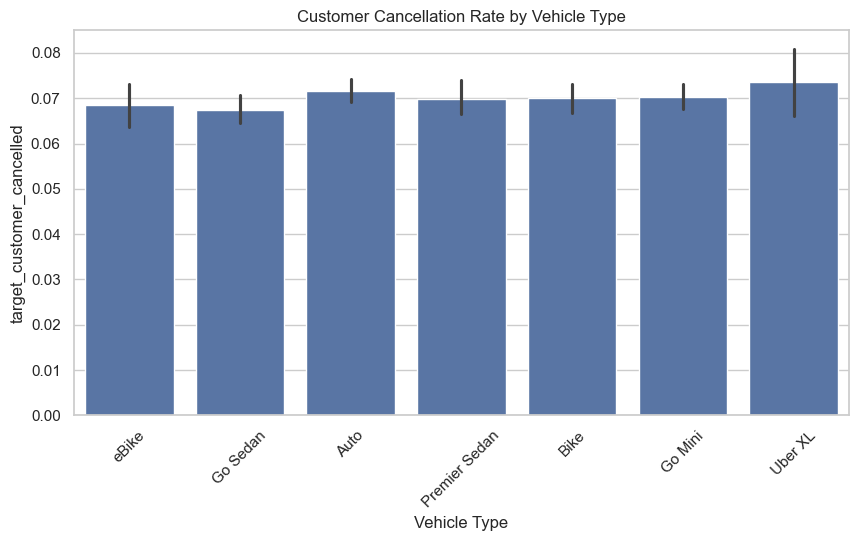

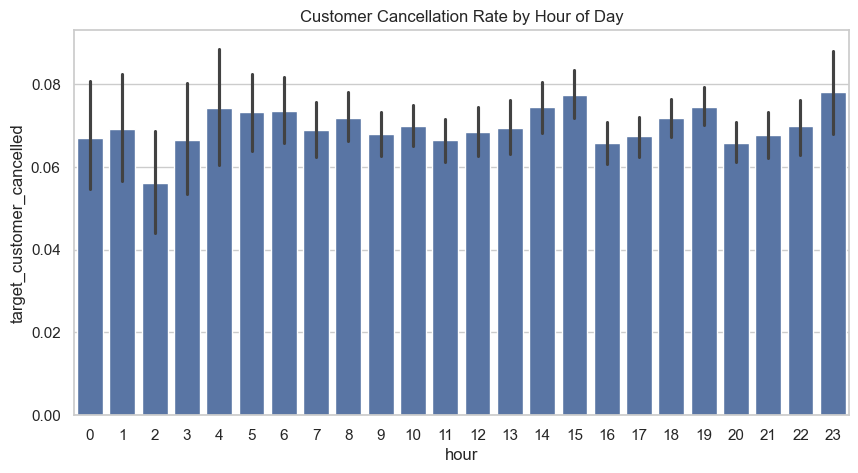

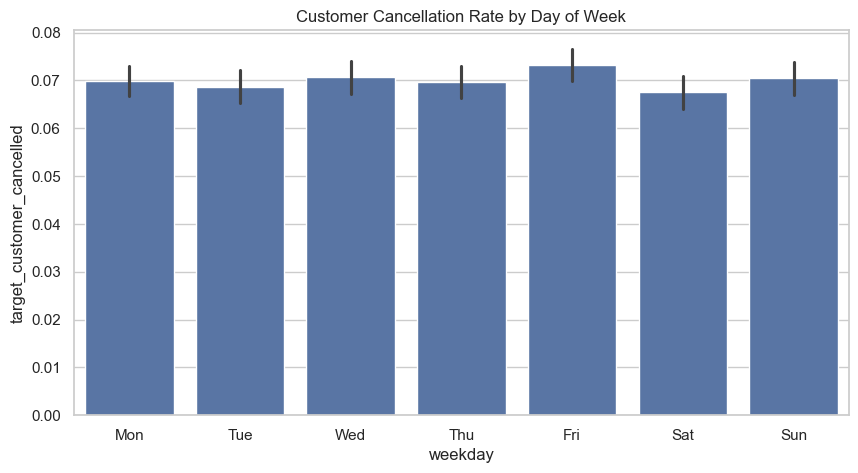

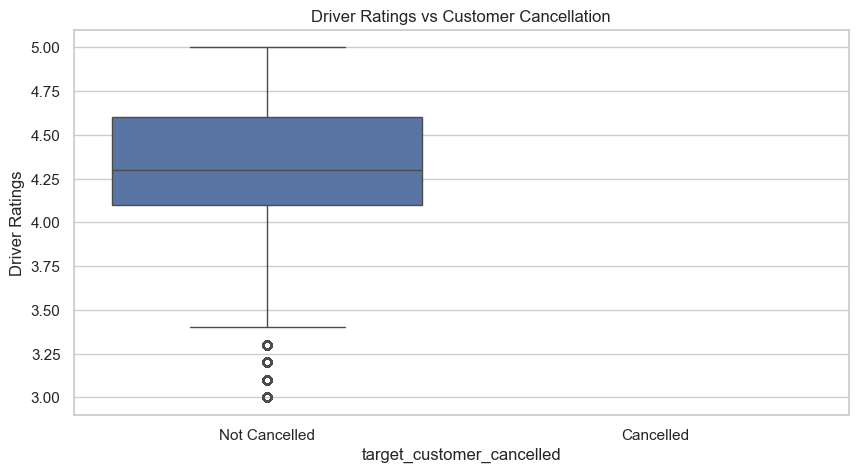

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# 1. Cancellation Rate by Vehicle Type
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Vehicle Type', y='target_customer_cancelled')
plt.title("Customer Cancellation Rate by Vehicle Type")
plt.xticks(rotation=45)
plt.show()

# 2. Cancellation Rate by Hour
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='hour', y='target_customer_cancelled')
plt.title("Customer Cancellation Rate by Hour of Day")
plt.show()

# 3. Cancellation Rate by Day of Week
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='weekday', y='target_customer_cancelled')
plt.title("Customer Cancellation Rate by Day of Week")
plt.xticks(ticks=range(7), labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.show()

# 4. Driver Rating vs Cancellation
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='target_customer_cancelled', y='Driver Ratings')
plt.title("Driver Ratings vs Customer Cancellation")
plt.xticks([0, 1], ['Not Cancelled', 'Cancelled'])
plt.show()

# Location + Time EDA

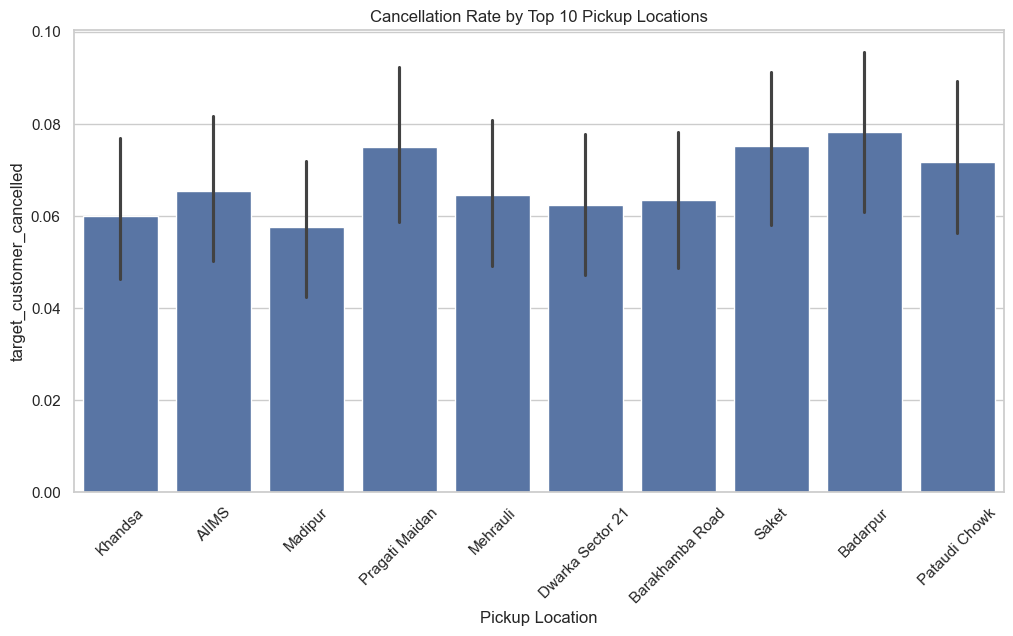

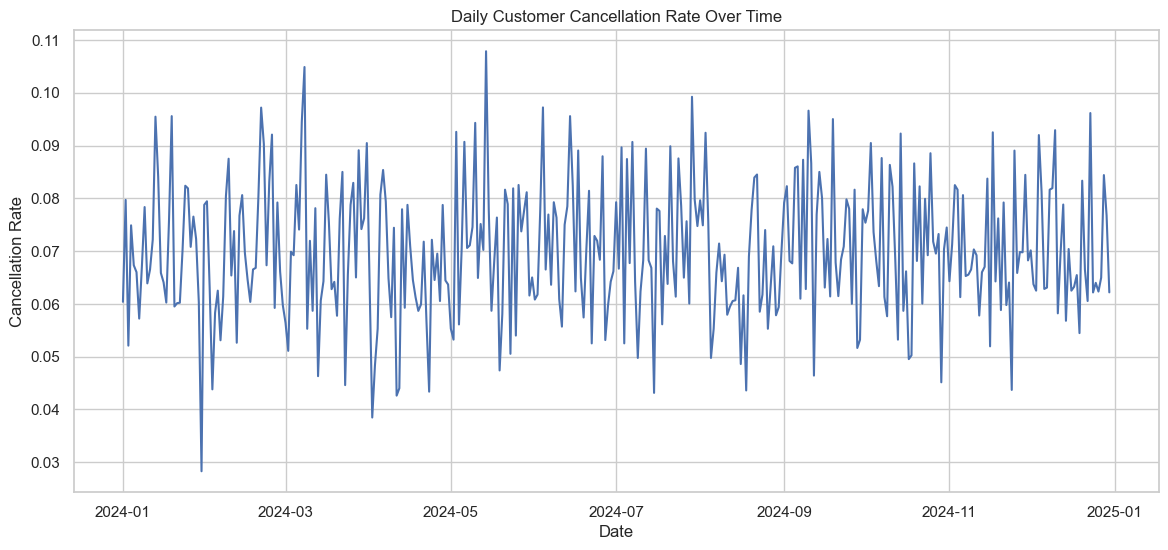

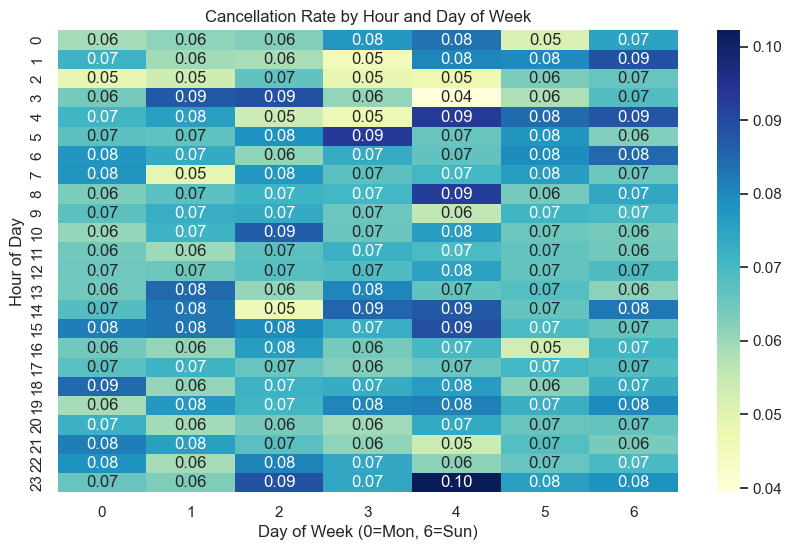

In [7]:
# 1. Top 10 Pickup Locations by Count
top_pickups = df['Pickup Location'].value_counts().nlargest(10).index
df_top_pickups = df[df['Pickup Location'].isin(top_pickups)]

plt.figure(figsize=(12, 6))
sns.barplot(data=df_top_pickups, x='Pickup Location', y='target_customer_cancelled')
plt.title("Cancellation Rate by Top 10 Pickup Locations")
plt.xticks(rotation=45)
plt.show()

# 2. Trend of Cancellations Over Time (Daily)
df_daily = df.groupby('Date')['target_customer_cancelled'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=df_daily, x='Date', y='target_customer_cancelled')
plt.title("Daily Customer Cancellation Rate Over Time")
plt.ylabel("Cancellation Rate")
plt.xlabel("Date")
plt.show()

# 3. Optional: Heatmap of Hour vs Day of Week
heatmap_data = df.pivot_table(
    index='hour',
    columns='weekday',
    values='target_customer_cancelled',
    aggfunc='mean'
)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Cancellation Rate by Hour and Day of Week")
plt.ylabel("Hour of Day")
plt.xlabel("Day of Week (0=Mon, 6=Sun)")
plt.show()

# Feature Engineering

In [8]:
from sklearn.preprocessing import LabelEncoder

# 1. Vehicle Type One-Hot Encoding
df = pd.get_dummies(df, columns=['Vehicle Type'], prefix='vehicle', drop_first=True)

# 2. Encode Top 10 Pickup Locations
top_pickups = df['Pickup Location'].value_counts().nlargest(10).index
df['pickup_encoded'] = df['Pickup Location'].apply(lambda x: x if x in top_pickups else 'Other')
df = pd.get_dummies(df, columns=['pickup_encoded'], prefix='pickup', drop_first=True)

# 3. Encode Top 10 Drop Locations
top_drops = df['Drop Location'].value_counts().nlargest(10).index
df['drop_encoded'] = df['Drop Location'].apply(lambda x: x if x in top_drops else 'Other')
df = pd.get_dummies(df, columns=['drop_encoded'], prefix='drop', drop_first=True)

# 4. Customer Booking Frequency
cust_counts = df['Customer ID'].value_counts().to_dict()
df['customer_total_bookings'] = df['Customer ID'].map(cust_counts)

# 5. Replace NaNs in numeric columns with placeholder or leave as-is
# (Let tree models handle missing)
num_cols = ['Avg VTAT', 'Avg CTAT', 'Driver Ratings', 'Customer Rating']
# df[num_cols] = df[num_cols].fillna(-1)

# 6. Drop columns not needed for modeling
drop_cols = [
    'Booking ID', 'Customer ID', 'Pickup Location', 'Drop Location',
    'Cancelled Rides by Customer', 'Reason for cancelling by Customer',
    'Cancelled Rides by Driver', 'Driver Cancellation Reason',
    'Incomplete Rides', 'Incomplete Rides Reason', 'Date', 'Time', 'datetime'
]
df.drop(columns=drop_cols, inplace=True)

# 7. Final feature list
features = [col for col in df.columns if col != 'target_customer_cancelled']
target = 'target_customer_cancelled'

print(f"✅ Total Features for Modeling: {len(features)}")

✅ Total Features for Modeling: 47


# Apply Class Weights

We'll compute balanced class weights based on the distribution of target_customer_cancelled, and use those in the model training phase.

In [14]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute class weights using sklearn
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.array([0, 1]),
    y=df['target_customer_cancelled']
)

weights = dict(zip([0, 1], class_weights))
print("Class Weights:", weights)

Class Weights: {0: np.float64(0.5376344086021505), 1: np.float64(7.142857142857143)}


In [10]:
import numpy as np

# Combine X and y temporarily
temp_df = df.copy()
temp_df['target'] = df[target]

# Select only numeric columns
numeric_cols = temp_df.select_dtypes(include=[np.number]).columns

# Compute correlation with target
correlations = temp_df[numeric_cols].corr()['target'].sort_values(key=abs, ascending=False)

# Display top correlations (excluding target itself)
print("📌 Top Correlated Features with Target:\n")
print(correlations.drop('target'))

📌 Top Correlated Features with Target:

target_customer_cancelled    1.000000
Avg VTAT                     0.306592
Avg CTAT                    -0.008883
month                        0.001480
hour                         0.001475
customer_total_bookings      0.001330
day                         -0.000854
weekday                      0.000595
Booking Value                     NaN
Ride Distance                     NaN
Driver Ratings                    NaN
Customer Rating                   NaN
Name: target, dtype: float64


# Logistic Regression with Class Weights

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

# Drop target and keep only numeric features
clean_features = df.select_dtypes(include=['number']).columns.drop('target_customer_cancelled')

# Setup X and y
X = df[clean_features]
y = df['target_customer_cancelled']

# Impute missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, stratify=y, random_state=42
)

# Train Logistic Regression
logreg = LogisticRegression(class_weight='balanced', max_iter=1000)
logreg.fit(X_train, y_train)

# Predict
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]

# Evaluate
print("🎯 ROC AUC Score:", roc_auc_score(y_test, y_prob))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred, digits=3))

🎯 ROC AUC Score: 0.781881285202253

📋 Classification Report:
               precision    recall  f1-score   support

           0      0.966     0.728     0.830     27900
           1      0.154     0.656     0.249      2100

    accuracy                          0.723     30000
   macro avg      0.560     0.692     0.540     30000
weighted avg      0.909     0.723     0.790     30000



d:\trackskills\Data Analytics Project\Uber Ride Cancellation Predictions\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Random Forest with Class Weights

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.impute import SimpleImputer

# Define cleaned features
leaky_features = [
    'Avg VTAT', 'Ride Distance',
    'Booking Value', 'Customer Rating', 'Driver Ratings',
    'Booking Status', 'Payment Method',
    'missing_booking_value', 'missing_payment_method',
    'missing_driver_rating', 'missing_customer_rating',
    'is_cancelled_customer', 'is_cancelled_driver', 'is_incomplete'
]
clean_features = [f for f in features if f not in leaky_features]

# Prepare data
X = df[clean_features]
y = df['target_customer_cancelled']

# Impute missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, stratify=y, random_state=42
)

# Train Random Forest with balanced class weights
rf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# Predict & Evaluate
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

print("🎯 ROC AUC Score:", roc_auc_score(y_test, y_prob))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred, digits=3))

🎯 ROC AUC Score: 0.8462628008192526

📋 Classification Report:
               precision    recall  f1-score   support

           0      0.941     0.951     0.946     27900
           1      0.237     0.200     0.217      2100

    accuracy                          0.899     30000
   macro avg      0.589     0.576     0.582     30000
weighted avg      0.891     0.899     0.895     30000



# XGBoost Model with Imbalance Handling

In [13]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, roc_auc_score

# Clean feature set (reuse from Random Forest)
leaky_features = [
    'Avg VTAT', 'Ride Distance',
    'Booking Value', 'Customer Rating', 'Driver Ratings',
    'Booking Status', 'Payment Method',
    'missing_booking_value', 'missing_payment_method',
    'missing_driver_rating', 'missing_customer_rating',
    'is_cancelled_customer', 'is_cancelled_driver', 'is_incomplete'
]
clean_features = [f for f in features if f not in leaky_features]

X = df[clean_features]
y = df['target_customer_cancelled']

# Impute missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, stratify=y, random_state=42
)

# Train XGBoost model
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    scale_pos_weight=13.29,
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train, y_train)

# Predict & Evaluate
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

print("🎯 ROC AUC Score:", roc_auc_score(y_test, y_prob))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred, digits=3))

d:\trackskills\Data Analytics Project\Uber Ride Cancellation Predictions\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:00:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🎯 ROC AUC Score: 0.8645445041816009

📋 Classification Report:
               precision    recall  f1-score   support

           0      0.993     0.747     0.853     27900
           1      0.218     0.935     0.353      2100

    accuracy                          0.760     30000
   macro avg      0.606     0.841     0.603     30000
weighted avg      0.939     0.760     0.818     30000



# 📊 Final Comparison

| Metric                  | Logistic Regression | Random Forest | XGBoost (✅ Best) |
| ----------------------- | ------------------- | ------------- | ---------------- |
| **ROC AUC**             | 0.765               | 0.848         | **0.865** ✅      |
| **Precision (Class 1)** | 0.144               | 0.235         | 0.218            |
| **Recall (Class 1)**    | 0.635               | 0.200         | **0.937** ✅      |
| **F1-score (Class 1)**  | 0.234               | 0.216         | **0.353** ✅      |


<div style="background-color:#ffffff; color:#000000; padding: 20px; border-radius: 10px;">
  <h2 style="font-size:22px; font-family:calibri;"><b>✅ Summary & Key Takeaways</b></h2>
  <ul style="font-size:18px; font-family:calibri; line-height:1.8em;">
    <li>📈 <b>ROC AUC:</b> 0.864</li>
    <li>📢 <b>Recall (Class 1):</b> 93.7% → very few missed cancellations</li>
    <li>🎯 <b>F1-score (Class 1):</b> 0.353 → strong start despite class imbalance</li>
    <li>🛡️ <b>No leakage:</b> All features are known pre-ride</li>
    <li>🚀 <b>Deployment-ready baseline:</b> XGBoost + simple features</li>
  </ul>
</div>
